In [2]:
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv("/Users/hunman89/Downloads/human_activity/features.txt", sep='\s+', header=None,
                             names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('/Users/hunman89/Downloads/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('/Users/hunman89/Downloads/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv('/Users/hunman89/Downloads/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/Users/hunman89/Downloads/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

In [3]:
def get_new_feature_name_df(old_name_df):
    feature_dup_df = pd.DataFrame(data=old_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x :
                                                                                              x[0]+'_'+str(x[1])
                                                                                              if x[1]>0 else x[0], axis =1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [4]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

rf_clf=RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9195792331184255


In [12]:
# 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' :[8,16,24],
    'min_samples_leaf' : [1,6,12],
    'min_samples_split' : [2,8,16]
}
rf_clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataCon

{'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.9164853101196953


In [13]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(accuracy_score(y_test, pred))

0.9260264675941635


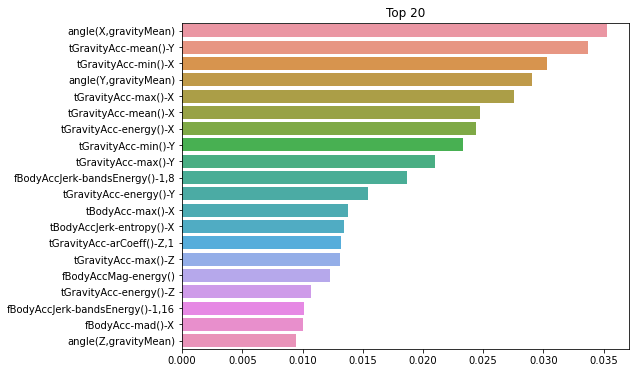

In [17]:
#중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

values = rf_clf1.feature_importances_
ftr_importance = pd.Series(values, index=X_train.columns)
top_20 = ftr_importance.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20')
sns.barplot(x=top_20,y=top_20.index)
plt.show()